In [3]:
proc import out=work.data
datafile="timeseries_ppi.csv"
dbms=csv replace; getnames=yes; datarow=2;
run;

In [4]:
data data;
    set data;
    dppi=dif(ppi);
    lppi=lag(ppi);
    ldppi=lag(dppi);
run;

In [32]:
proc print data=data(obs=10);
    var yearqrt ppi dppi lppi ldppi;
run;


Obs,yearqrt,ppi,dppi,lppi,ldppi
1,01JAN60:00:00:00,25.4,.,.,.
2,01APR60:00:00:00,25.440001,0.040001,25.4,.
3,01JUL60:00:00:00,25.370001,-0.07,25.440001,0.04000
4,01OCT60:00:00:00,25.4,0.029999,25.370001,-0.07000
5,01JAN61:00:00:00,25.49,0.09,25.4,0.03000
6,01APR61:00:00:00,25.24,-0.25,25.49,0.09000
7,01JUL61:00:00:00,25.24,0,25.24,-0.25000
8,01OCT61:00:00:00,25.280001,0.040001,25.24,0.00000
9,01JAN62:00:00:00,25.42,0.139999,25.280001,0.04000
10,01APR62:00:00:00,25.280001,-0.139999,25.42,0.14000


In [6]:
%let ylist = ppi;
%let dylist = dppi;
%let time = t;
%let lylist = lppi;
%let trend=trend;
%let xlist = cpi gdp;

In [7]:
proc means data=data;
var &ylist &dylist &time;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
ppi dppi t,169 168 169,64.6815385 0.4642857 670564715,30.2659545 0.9207450 386030145,25.2400000 -3.2100000 7862400.00,110.4300000 3.0800010 1333238400



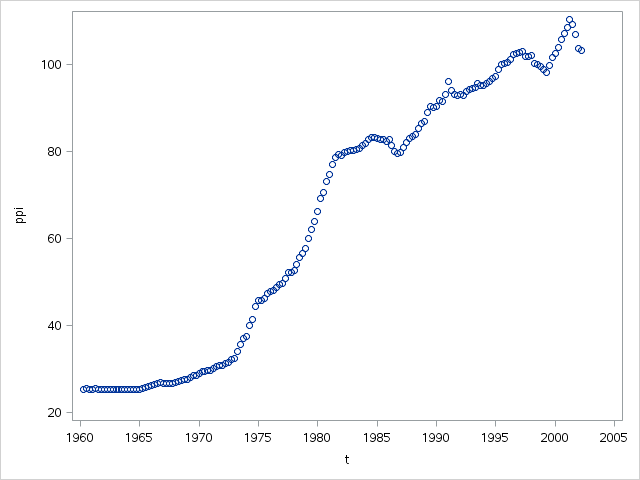

In [11]:
* Plotting the data;
proc sgplot data=data;
    scatter x=&time y=&ylist;
run;


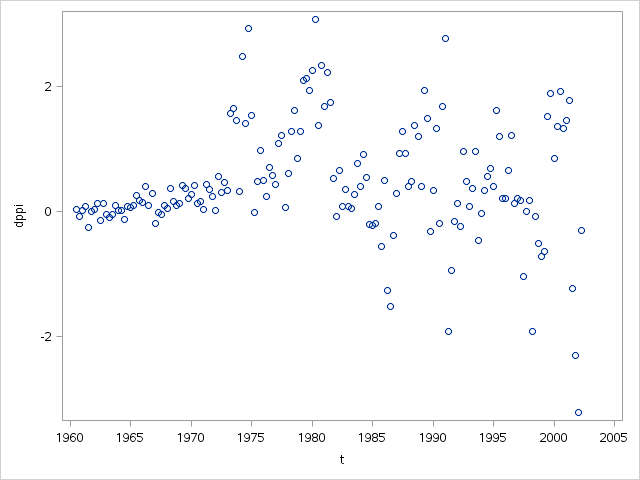

In [12]:
proc sgplot data=data;
    scatter x=&time y=&dylist;
run;


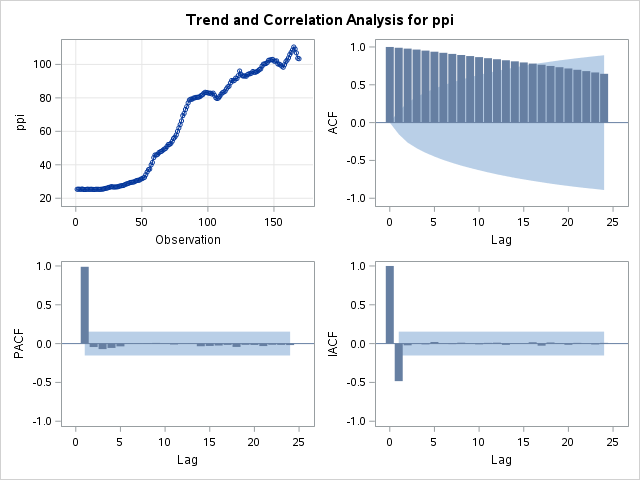

In [13]:
proc arima data=data;
identify var=&ylist stationarity=(adf);
run;


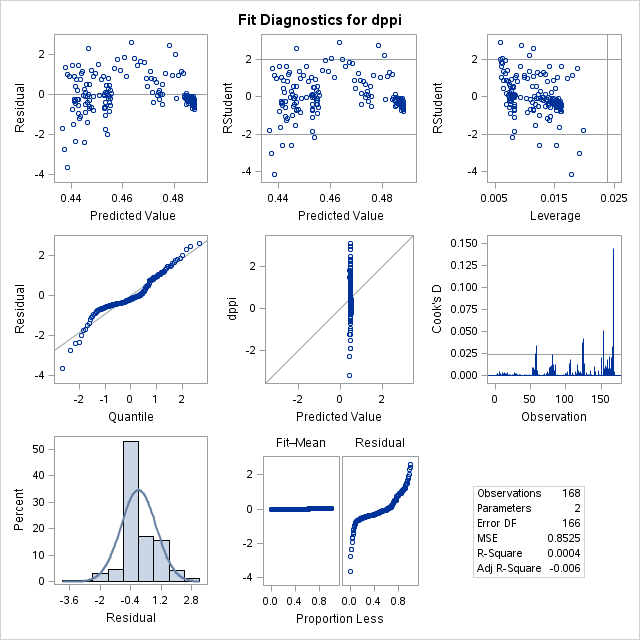
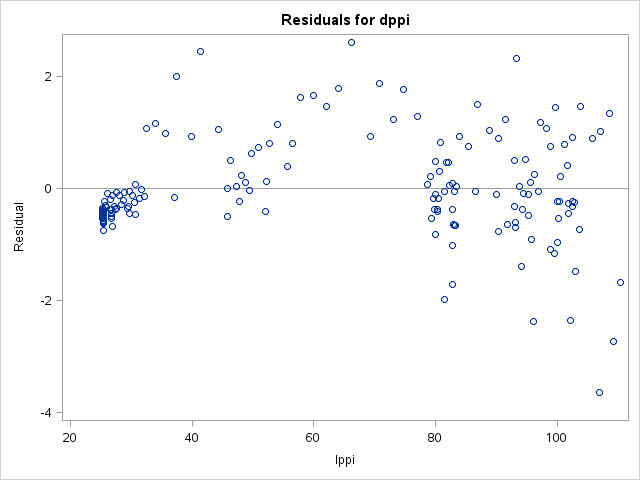
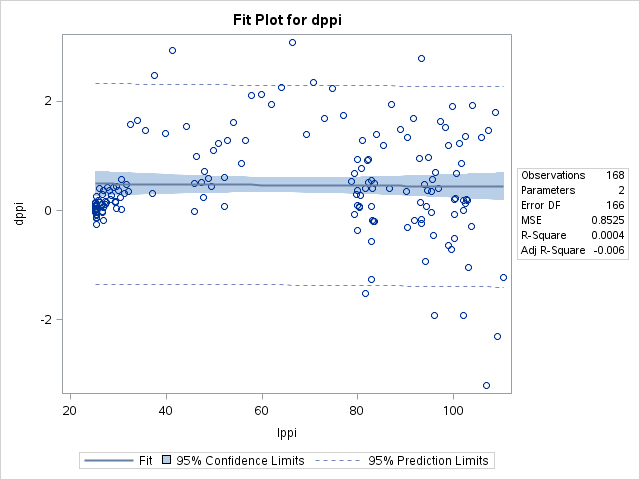
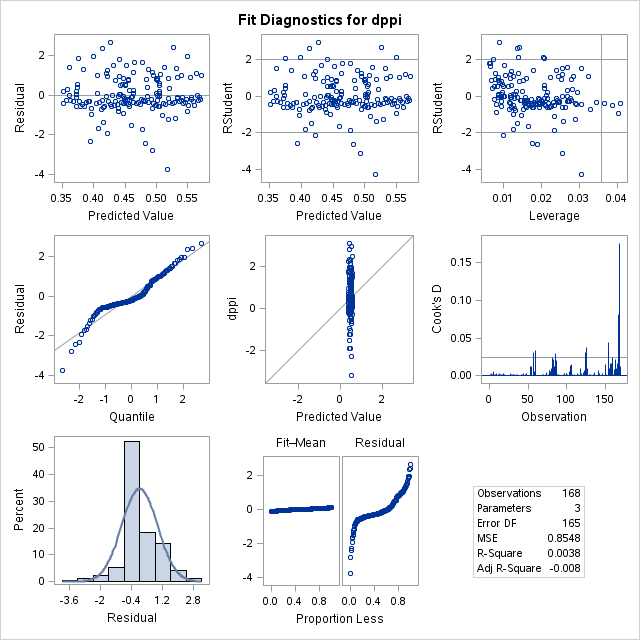
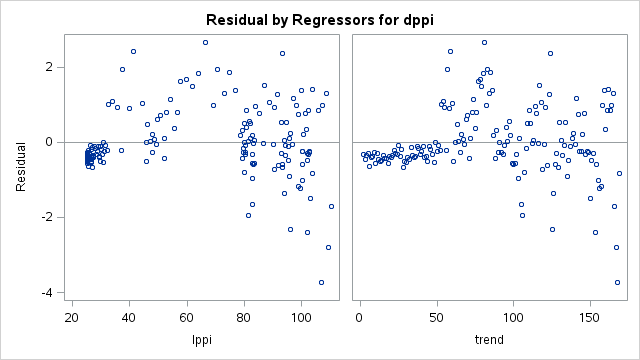

In [15]:
* Dickey-Fuller test regressions;
proc reg data=data;
model &dylist = &lylist;
model &dylist = &lylist &trend;
run;


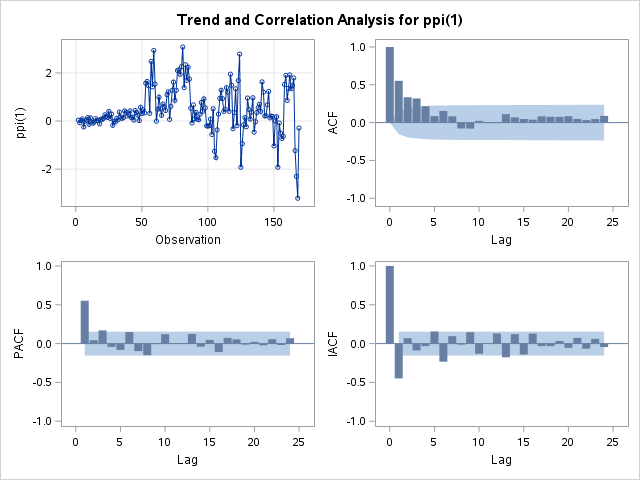

In [16]:
* ARIMA for differenced variable;
proc arima data=data;
identify var=&ylist(1) stationarity=(adf);
run;


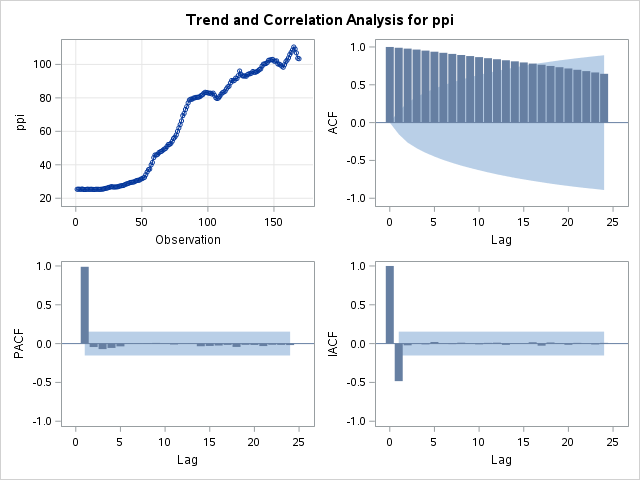
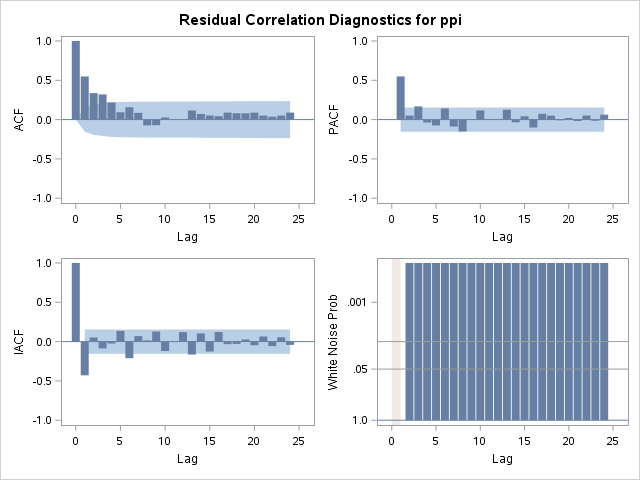
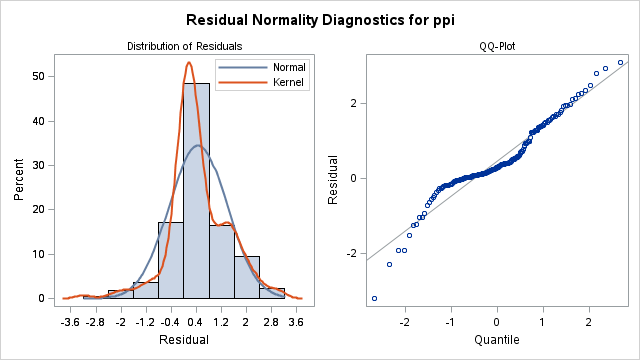

In [17]:
* ARIMA(1,0,0) or AR(1);
proc arima data=data;
identify var=&ylist;
estimate p=1 method=ml;
run;


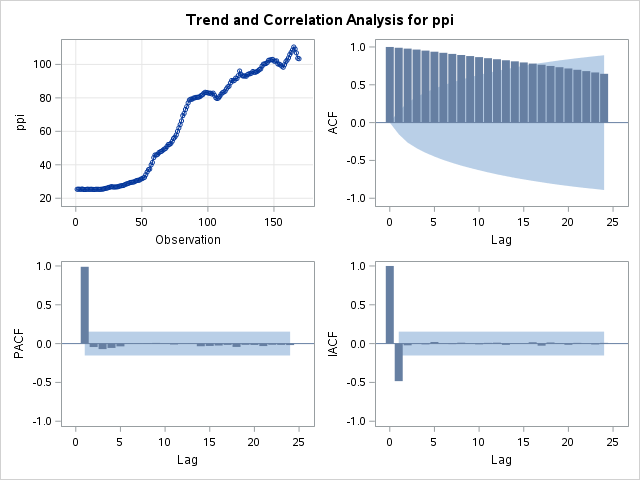
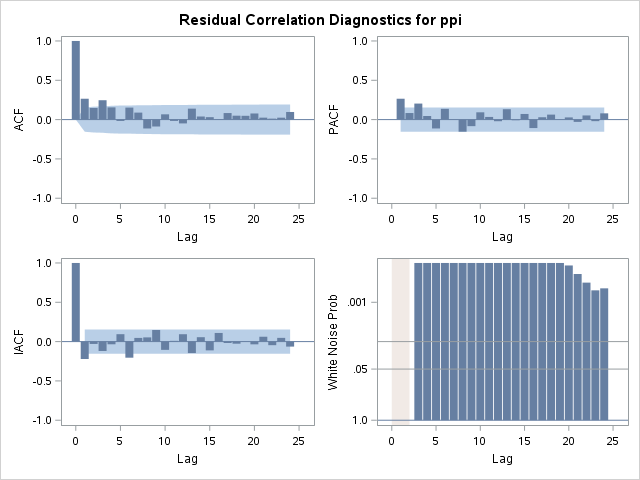
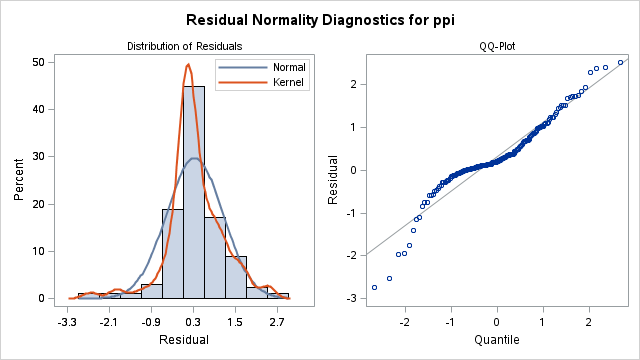

In [18]:
* ARIMA(2,0,0) or AR(2);
proc arima data=data;
identify var=&ylist;
estimate p=2;
run;


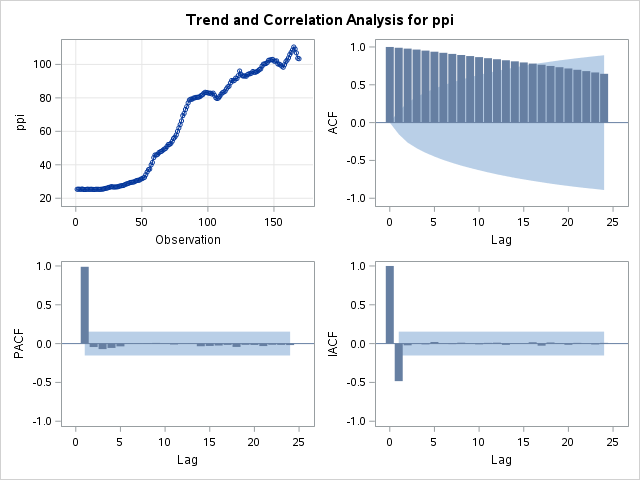
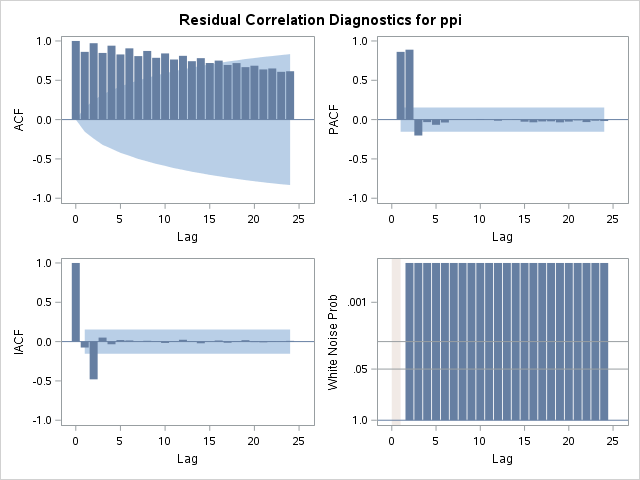
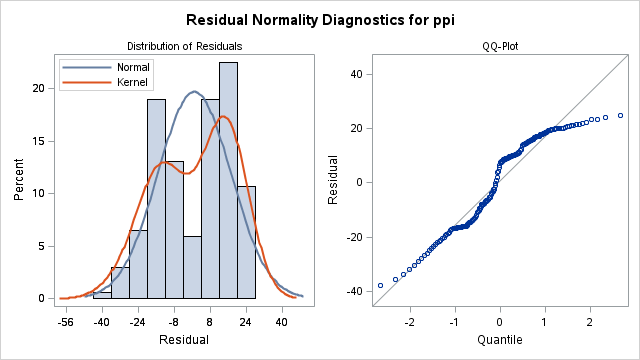

In [19]:
* ARIMA(0,0,1) or MA(1);
proc arima data=data;
identify var=&ylist;
estimate q=1;
run;


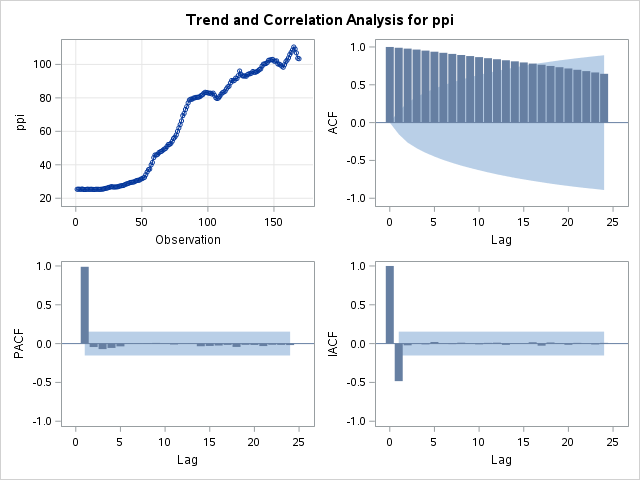
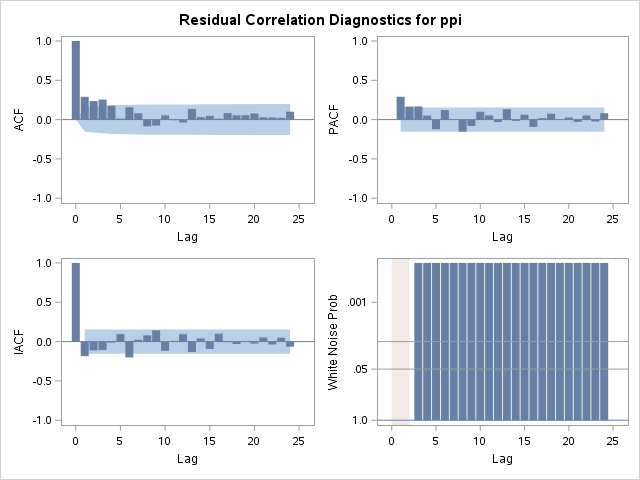
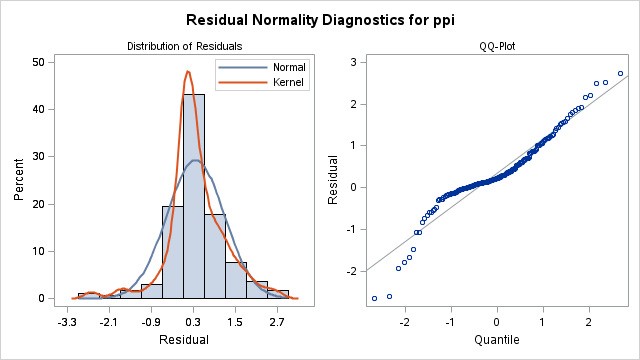

In [20]:
* ARIMA(1,0,1) or ARMA(1,1);
proc arima data=data;
identify var=&ylist;
estimate p=1 q=1;
run;


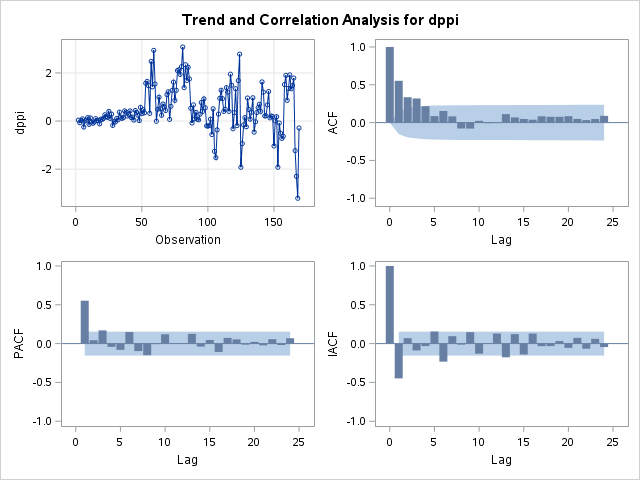
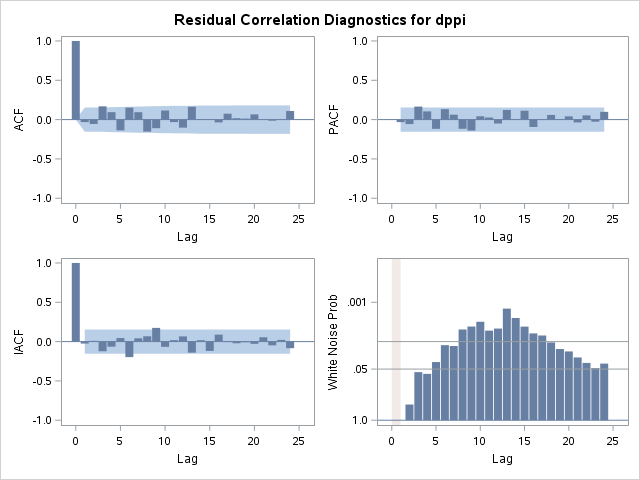
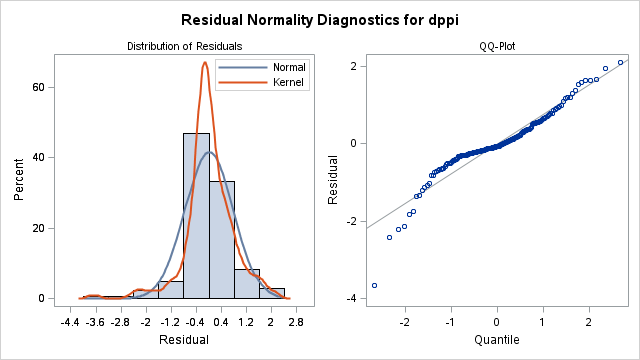

In [21]:
* ARIMA(1,1,0);
proc arima data=data;
identify var=&dylist;
estimate p=1;
run;


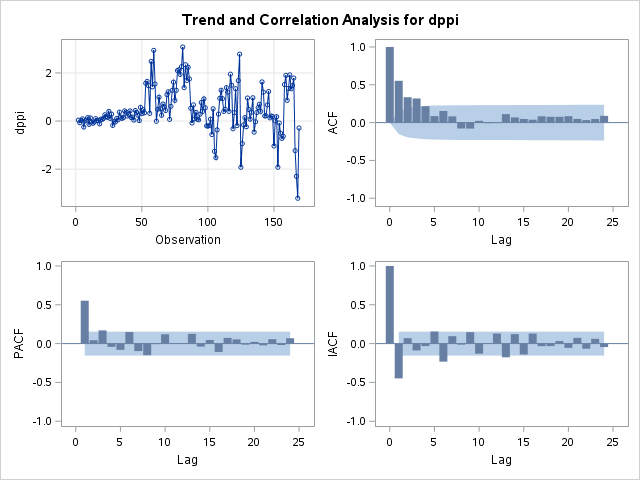
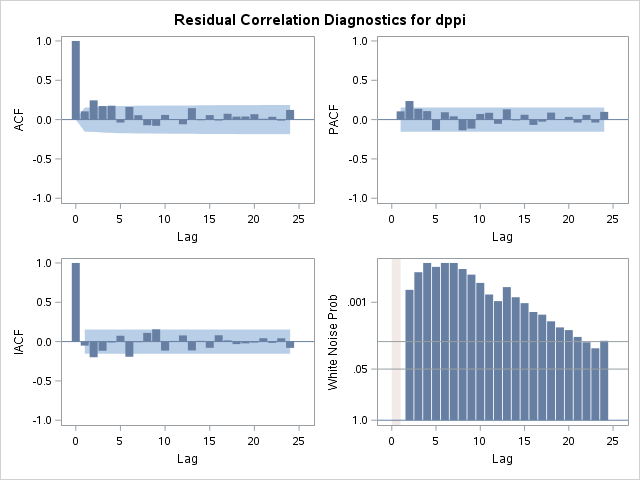
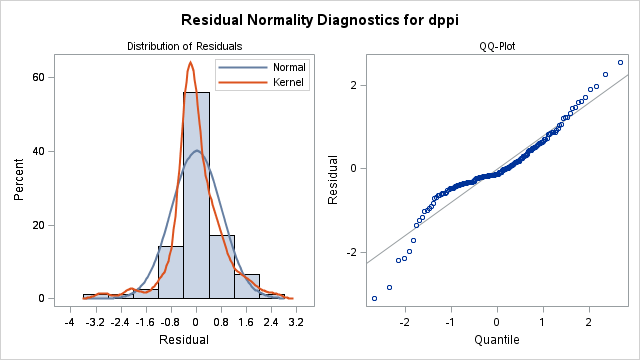

In [22]:
* ARIMA(0,1,1);
proc arima data=data;
identify var=&dylist;
estimate q=1;
run;


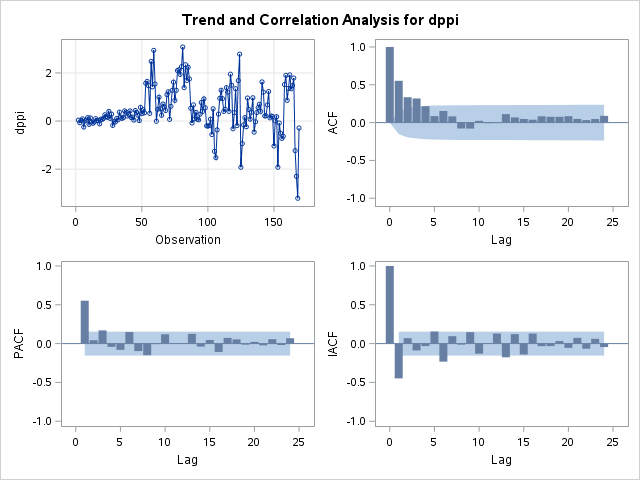
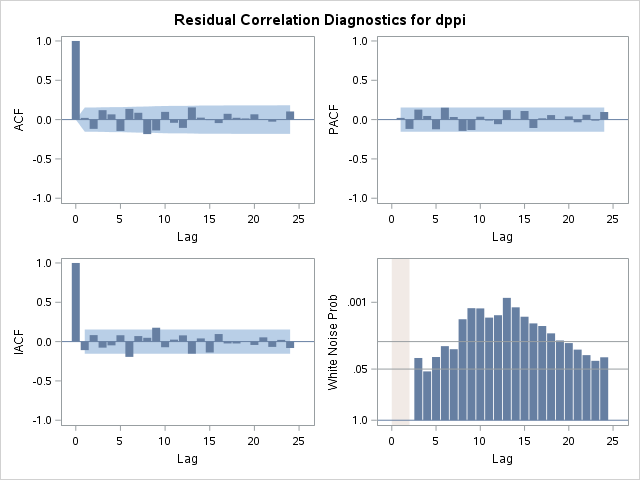
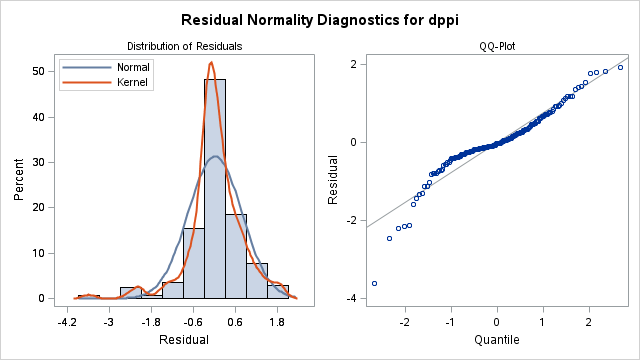

In [23]:
* ARIMA(1,1,1);
proc arima data=data;
identify var=&dylist;
estimate p=1 q=1;
run;


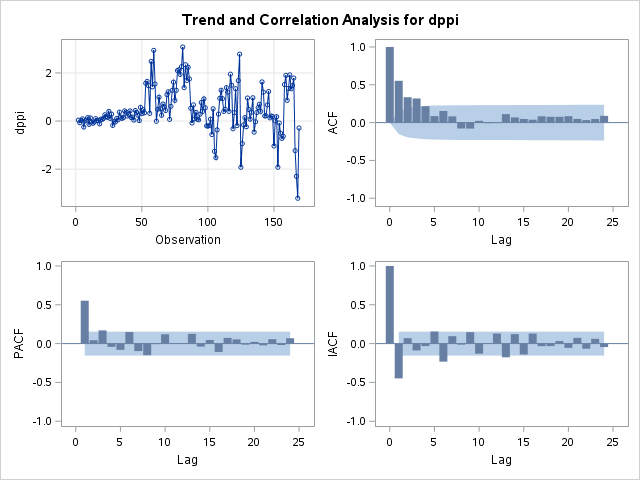
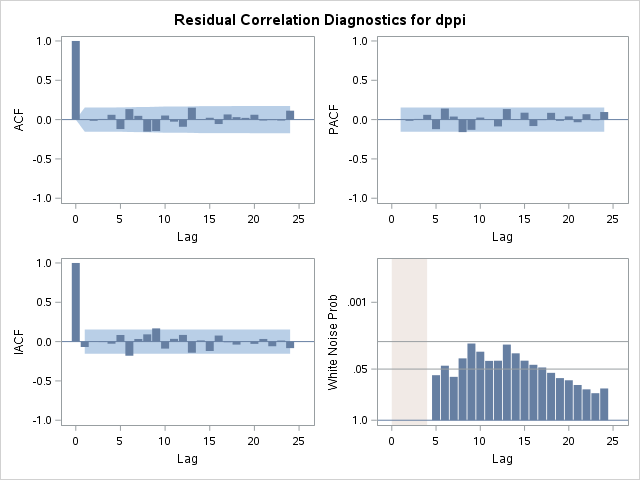
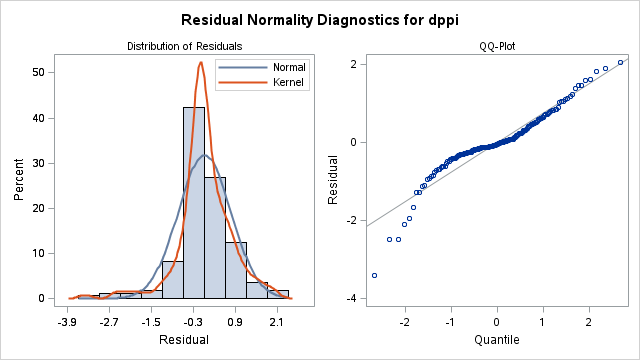

In [24]:
* ARIMA(1,1,3);
proc arima data=data;
identify var=&dylist;
estimate p=1 q=3;
run;


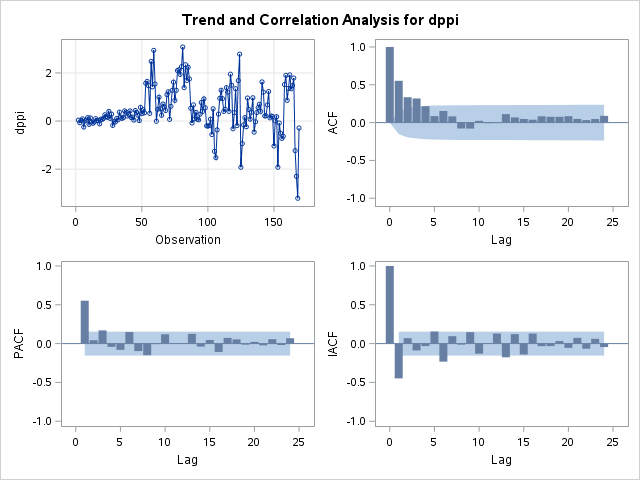
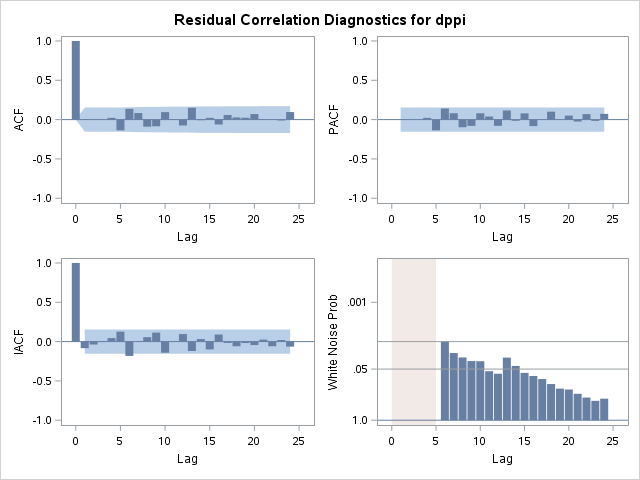
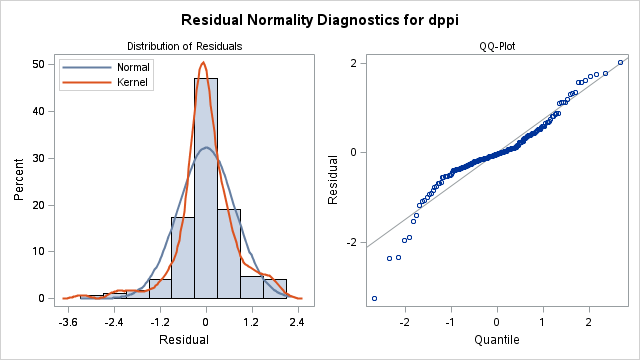

In [25]:
* ARIMA(2,1,3);
proc arima data=data;
identify var=&dylist;
estimate p=2 q=3;
run;


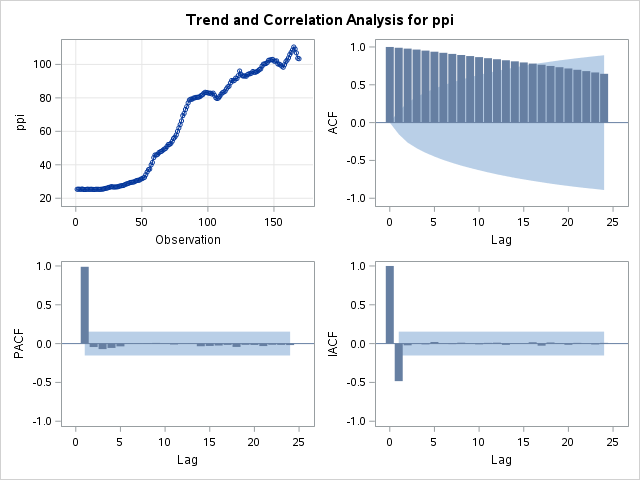
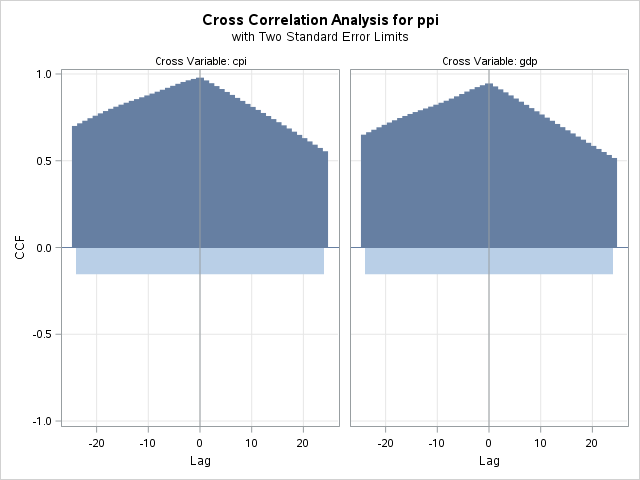
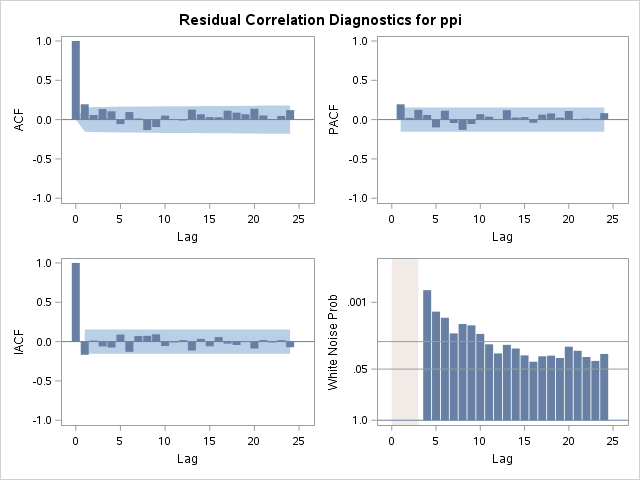
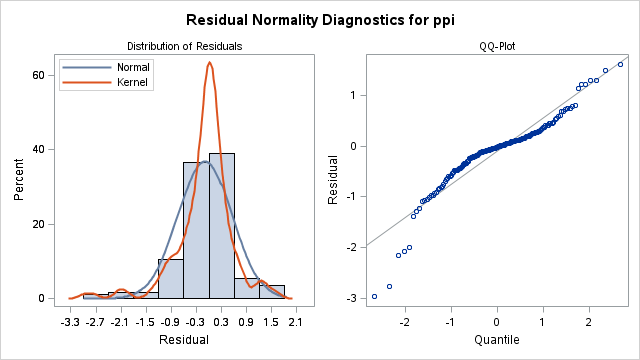

In [26]:
* ARIMA(2,0,1) with independent variables;
proc arima data=data;
identify var=&ylist crosscorr=(&xlist);
estimate input=(&xlist) p=2 q=1 plot;
run;


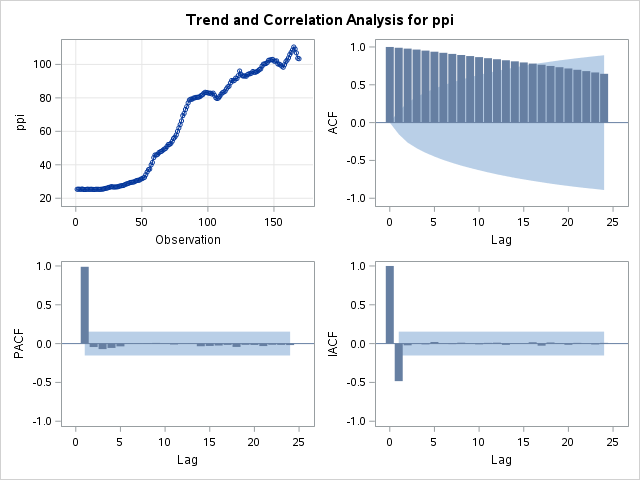
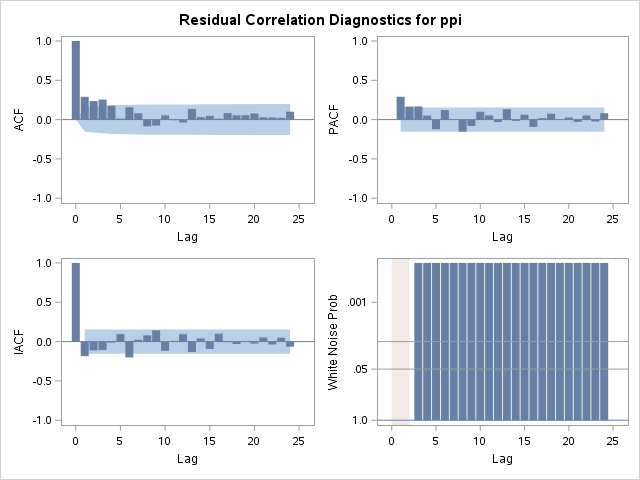
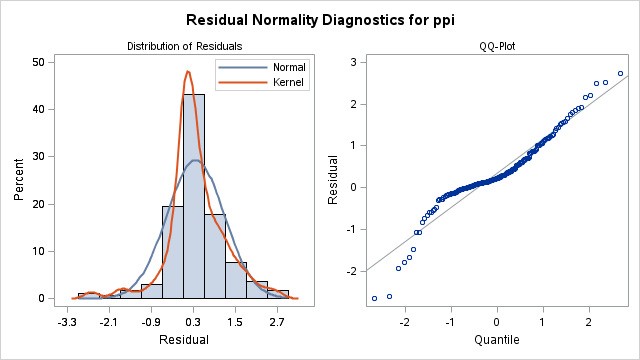
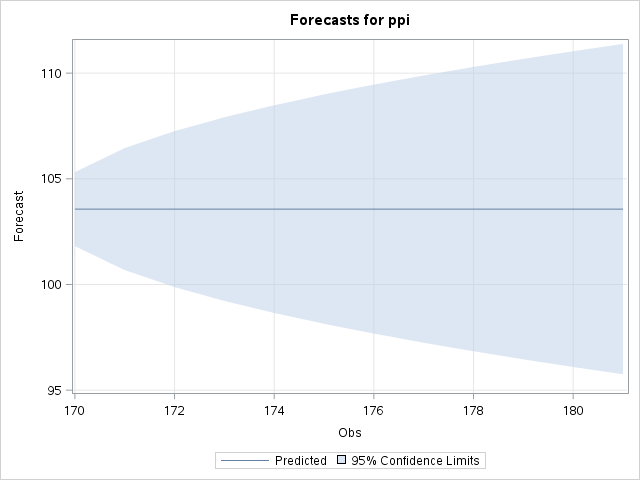

In [27]:
* ARIMA (1,0,1) forecasting;
proc arima data=data;
identify var=&ylist;
estimate p=1 q=1;
forecast lead=12;
run;


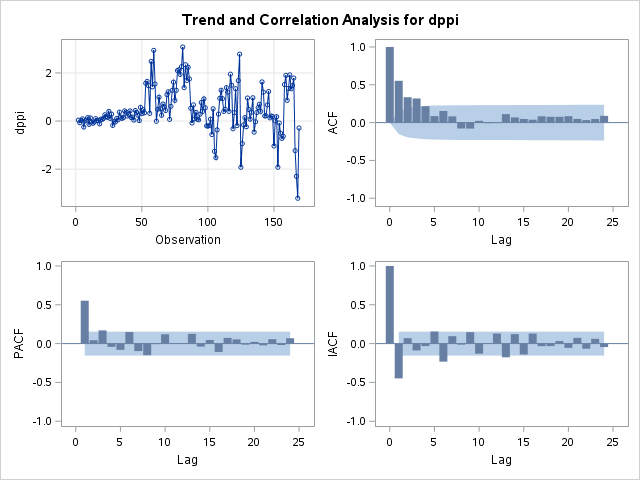
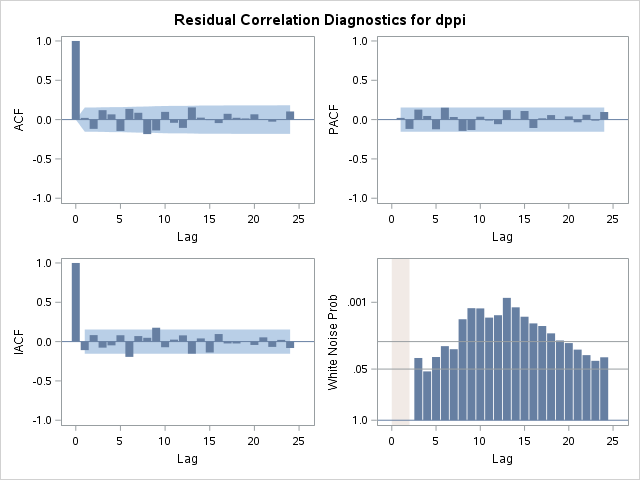
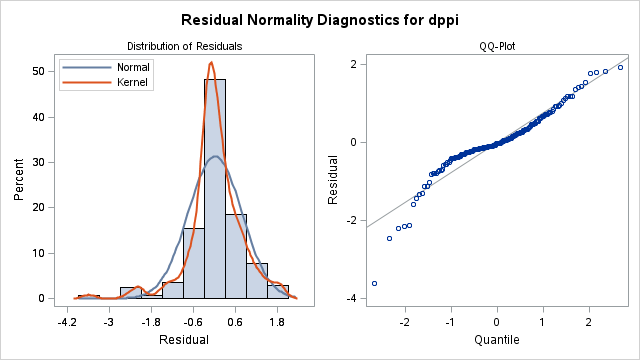
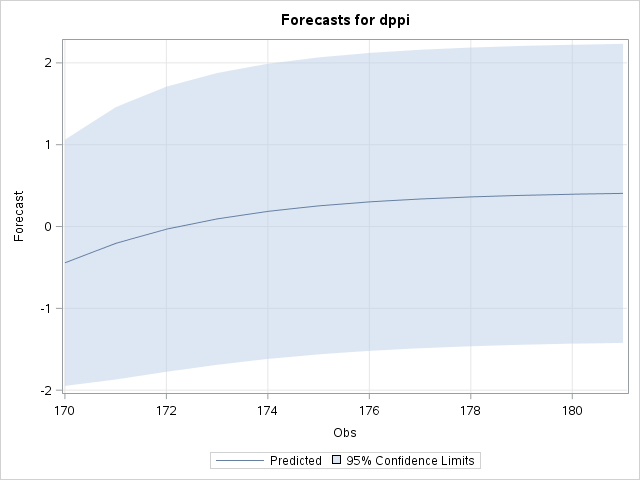

In [28]:
* ARIMA (1,1,1) forecasting;
proc arima data=data;
identify var=&dylist;
estimate p=1 q=1;
forecast lead=12;
run;